In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline

In [2]:
def fourier_first_derivative(u, dx):

    uhat = np.fft.fft(u)
    
    #Initialize wavenumbers k
    
    nx = u.size
    nyquist_freq = np.pi/dx #Define maximum k as the Nyquist frequency to avoid aliasing
    dk = nyquist_freq/(nx/2) #Define k interval
    k = np.arange(float(nx))
    
    #Order wavenumbers k
    k[:nx/2] = k[:nx/2]*dk 
    k[nx/2:] = k[:nx/2]-nyquist_freq
    
    #Calculate first derivative
    duhat = (1j*k)*uhat
    du = np.real(np.fft.ifft(duhat))
    
    return du

In [3]:
def fourier_second_derivative(u, dx):

    uhat = np.fft.fft(u)
    nx = u.size
    nyquist_freq = np.pi/dx
    dk = nyquist_freq/(nx/2)
    k = np.arange(float(nx))
    k[:nx/2] = k[:nx/2]*dk
    k[nx/2:] = k[:nx/2]-nyquist_freq
    duhat = (1j*k)**2*uhat
    ddu = np.real(np.fft.ifft(duhat))
    
    return ddu


In [4]:
#Specify Spatial Grid 

nx = 40
j = np.arange(nx)+1
x = j*2*np.pi/nx
dx = 2*np.pi/nx

#Define temporal grid


nt = 512
tmin = 0
tmax = 2
t = np.linspace(tmin, tmax, nt)
dt = t[1] - t[0]
nu = 0.1

#Define initial condition and boundary conditions
u_initial = np.sin(x)
uold = u_initial


#Initialize array for u(x, t_{i})
u = np.zeros((len(u_initial), nt))
u[:, 0] = u_initial












In [5]:
#Time Marching

for i in range(len(t)-1):
    
    if i == 0:
        du = fourier_first_derivative(u[:, i], dx)
        ddu = fourier_second_derivative(u[:, i], dx)
        RHS = 0.1*ddu - u[:, i]*du 
        unew = 2*dt*RHS + uold
        u[:, i+1] = unew
    
    else:
        du = fourier_first_derivative(u[:, i], dx)
        ddu = fourier_second_derivative(u[:, i], dx)
        RHS = 0.1*ddu - u[:, i]*du 
        unew = 2*dt*RHS + u[:, i-1]
        u[:, i+1] = unew
        
        if np.max(u[:, i]) > 2:
            
            break
        

    

    

    

    
    

    








/Users/admin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/admin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/admin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/admin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


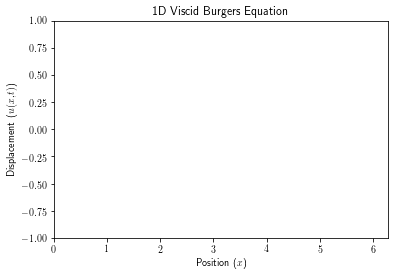

In [6]:
#Initialize Plot for animation

fig = plt.figure()
ax = plt.axes(xlim=(0, 2*np.pi), ylim=(-1, 1))
ax.set_xlabel(r'Position ($x$)')
ax.set_ylabel(r'Displacement ($u(x, t)$)')
plt.title(r'1D Viscid Burgers Equation')
line, = ax.plot([], [], lw=2, alpha = 0.8)

In [7]:
#Functions to animate plot through time steps

def init():
    line.set_data([], [])
    return line,

def animate(i):
    
    xmin = 0
    xmax = 2*np.pi
    
    x = np.linspace(xmin, xmax, nx)
    y = u[:, i]
    
    line.set_data(x, y)
    return line,



In [8]:
#Export to mpeg

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames= 200, interval=1, blit=True)

anim.save('Viscid_Burgers.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

        



    
    
